In [65]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Review Data

In [66]:
# Load the dataset
try:
    df = pd.read_csv('My.csv')
except FileNotFoundError:
    print("File not found. Please check the file path.")
    exit()

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display basic statistics
print("\nBasic statistics of the dataset:")
print(df.describe())

# Display class distribution
print("\nClass distribution:")
print(df['variety'].value_counts())

First few rows of the dataset:
   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

Basic statistics of the dataset:
       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Class dist

## Data Preparation

In [67]:

# Separate features and target
X = df.drop('variety', axis=1).values  # Features
y = df['variety'].astype('category').cat.codes.values  # Target (encoded)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##  Model Training and Evaluation


Accuracy: 1.00


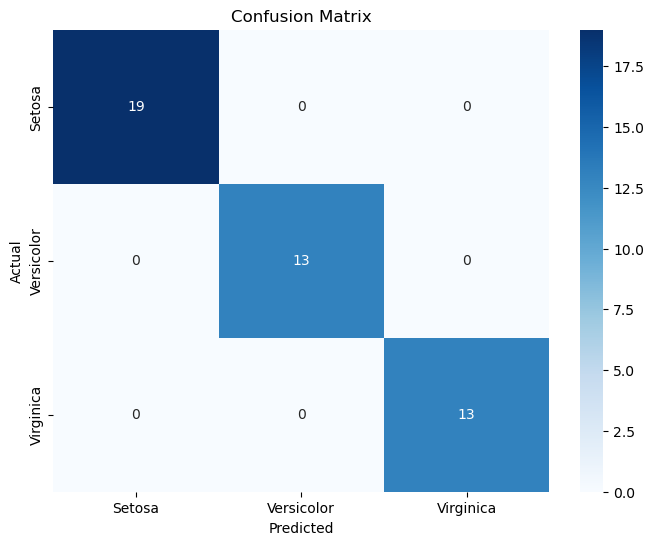


Classification report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
  Versicolor       1.00      1.00      1.00        13
   Virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [68]:
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['variety'].unique(), yticklabels=df['variety'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification report:")
print(classification_report(y_test, y_pred, target_names=df['variety'].unique()))

In [69]:
#tensorflow and keras imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

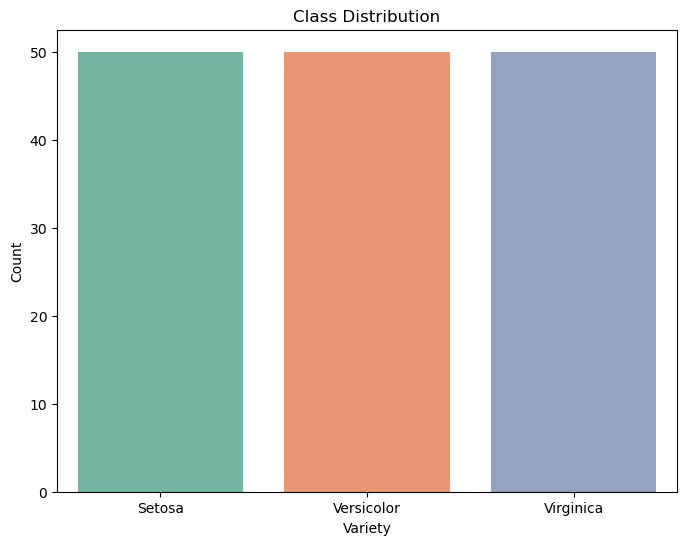

In [70]:
# Visualize the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='variety', hue='variety', data=df, palette='Set2', legend=False)
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xlabel('Variety')
plt.show()

In [71]:
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"k = {k}, Accuracy = {acc:.2f}")


k = 1, Accuracy = 0.98
k = 2, Accuracy = 0.98
k = 3, Accuracy = 1.00
k = 4, Accuracy = 0.98
k = 5, Accuracy = 1.00
k = 6, Accuracy = 1.00
k = 7, Accuracy = 1.00
k = 8, Accuracy = 1.00
k = 9, Accuracy = 1.00
k = 10, Accuracy = 1.00


In [72]:
model = keras.Sequential([
    layers.Dense(8, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20


c:\Users\madio\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.5529 - loss: 0.9042 - val_accuracy: 0.5778 - val_loss: 0.8843
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5248 - loss: 0.9083 - val_accuracy: 0.6000 - val_loss: 0.8657
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5974 - loss: 0.8620 - val_accuracy: 0.6000 - val_loss: 0.8482
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5873 - loss: 0.8524 - val_accuracy: 0.6000 - val_loss: 0.8316
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5720 - loss: 0.8537 - val_accuracy: 0.6000 - val_loss: 0.8155
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6261 - loss: 0.8152 - val_accuracy: 0.6000 - val_loss: 0.7996
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6105 - loss: 0.7944 - val_accuracy: 0.6222 - val_loss: 0.7843
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6664 - loss: 0.7867 - val_accuracy: 0.6667 - val_loss: 0.7690
Epoch 9/20

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7790 - loss: 0.6619 - val_accuracy: 0.8222 - val_loss: 0.6160
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7665 - loss: 0.6731 - val_accuracy: 0.8222 - val_loss: 0.6068
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7509 - loss: 0.6597 - val_accuracy: 0.8222 - val_loss: 0.5977
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8200 - loss: 0.6221 - val_accuracy: 0.8222 - val_loss: 0.5887
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8325 - loss: 0.5971 - val_accuracy: 0.8222 - val_loss: 0.5799
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8169 - loss: 0.6046 - val_accuracy: 0.8222 - val_loss: 0.5718
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8242 - loss: 0.6037 - val_accuracy: 0.8222 - val_loss: 0.5638
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8026 - loss: 0.6304 - val_accuracy: 0.8444 - val_loss: 0.5560


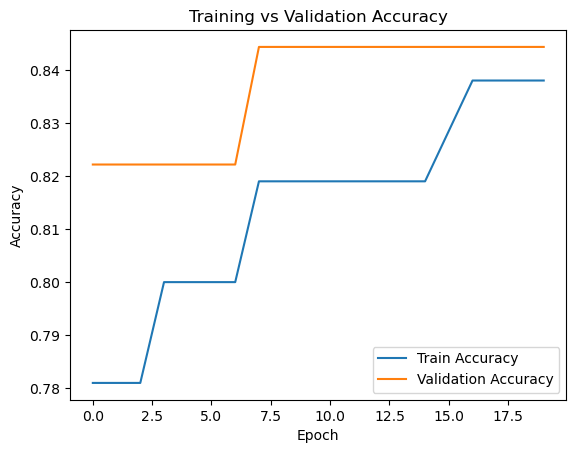

In [73]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [74]:
model.save("iris_nn_model.h5")


In [75]:
%pip install gradio

# Map encoded labels back to original class names
label_map = {0: "Setosa", 1: "Versicolor", 2: "Virginica"}

def predict_iris(sepal_length, sepal_width, petal_length, petal_width):
    # Put inputs into array and scale them
    input_data = scaler.transform([[sepal_length, sepal_width, petal_length, petal_width]])
    
    # Predict using the KNN model
    prediction = knn.predict(input_data)[0]
    return label_map[prediction]




Note: you may need to restart the kernel to use updated packages.


In [76]:
import gradio as gr

# Define input fields and interface
interface = gr.Interface(
    fn=predict_iris,
    inputs=[
        gr.Number(label="Sepal Length"),
        gr.Number(label="Sepal Width"),
        gr.Number(label="Petal Length"),
        gr.Number(label="Petal Width")
    ],
    outputs=gr.Text(label="Predicted Variety"),
    title="🌸 Iris Flower Classifier",
    description="Enter the flower's measurements to predict its variety (Setosa, Versicolor, Virginica)."
)

# Launch the app
interface.launch()
interface.launch(share=True)
# Save the Gradio app as a .py file
with open("iris_classifier_app.py", "w") as f:
    f.write("""
import gradio as gr

label_map = {0: "Setosa", 1: "Versicolor", 2: "Virginica"}

def predict_iris(sepal_length, sepal_width, petal_length, petal_width):
    input_data = scaler.transform([[sepal_length, sepal_width, petal_length, petal_width]])
    prediction = knn.predict(input_data)[0]
    return label_map[prediction]

interface = gr.Interface(
    fn=predict_iris,
    inputs=[
        gr.Number(label="Sepal Length"),
        gr.Number(label="Sepal Width"),
        gr.Number(label="Petal Length"),
        gr.Number(label="Petal Width")
    ],
    outputs=gr.Text(label="Predicted Variety"),
    title="🌸 Iris Flower Classifier",
    description="Enter the flower's measurements to predict its variety (Setosa, Versicolor, Virginica)."
)

interface.launch()
""")

* Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.


Rerunning server... use `close()` to stop if you need to change `launch()` parameters.
----
* Running on public URL: https://c935c2080a9868b62a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
